### Importa√ß√£o dos dados



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escrit√≥rio               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      Jo√£o Souza              DF                    1   
3     03/05/2022      Jo√£o Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       8 -22.19 -48.79  
1    cartao_credito                       4 -22.25 -42.66  
2    cartao_credito                       1 -15.83 -47.86  
3            boleto                       1 -30.17 -53.50  
4            boleto                       1 -18.10 -44.38

#1. An√°lise do faturamento


In [19]:
precos_lojas = [loja["Pre√ßo"], loja2["Pre√ßo"], loja3["Pre√ßo"], loja4["Pre√ßo"]]

In [20]:
faturamento_lojas= []
for i, precos in enumerate(precos_lojas, start=1):
  faturamento = sum(precos)
  faturamento_lojas.append(faturamento)
  print(f'faturamento da loja{i}: {round(faturamento,2)}')


faturamento da loja1: 1534509.12
faturamento da loja2: 1488459.06
faturamento da loja3: 1464025.03
faturamento da loja4: 1384497.58


In [11]:
!pip install matplotlib

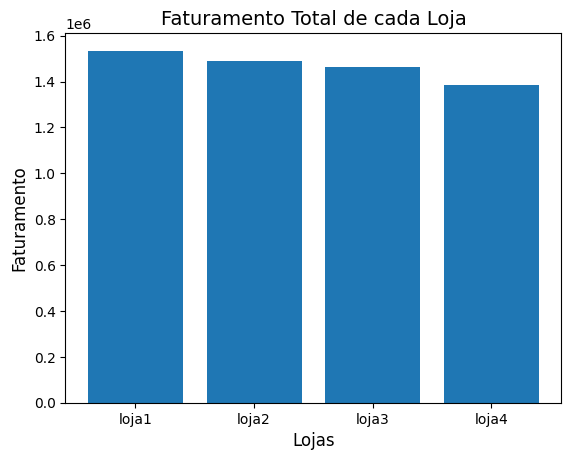

In [31]:
import matplotlib.pyplot as plt
lojas = ['loja1', 'loja2', 'loja3', 'loja4']
plt.bar(lojas, faturamento_lojas)
plt.title('Faturamento Total de cada Loja', fontsize=14)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento', fontsize=12)

plt.show()

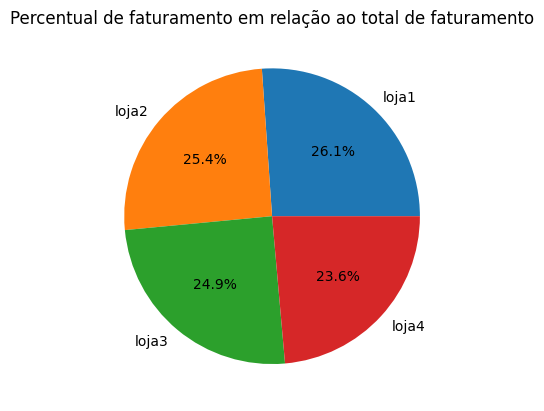

In [53]:
porcentagem_faturamento = []
for i in range(len(faturamento_lojas)):
  porcentagem = (100 * faturamento_lojas[i]) / sum(faturamento_lojas)
  porcentagem_faturamento.append(round(porcentagem,1))

porcentagem_faturamento

plt.pie(porcentagem_faturamento, labels=lojas, autopct='%1.1f%%')
plt.title('Percentual de faturamento em rela√ß√£o ao total de faturamento')
plt.show()


# 2. Vendas por Categoria


In [44]:
nome_categorias = list(set(loja['Categoria do Produto']))
categorias_lojas = [list(loja['Categoria do Produto']), list(loja2['Categoria do Produto']), list(loja3['Categoria do Produto']), list(loja4['Categoria do Produto'])]

In [43]:
total_vendas_categorias = []
for categoria in categorias_lojas:
  vendas_por_categoria = [categoria.count(nome) for nome in nome_categorias]
  total_vendas_categorias.append(vendas_por_categoria)

print('Vendas por categorias')
for i, vendas in enumerate(total_vendas_categorias):
  print(f'loja{i+1}')
  for j, nome in enumerate(nome_categorias):
    print(f'Categoria:{nome}\nVendas da Categoria:{total_vendas_categorias[i][j]}')

Vendas por categorias
loja1
Categoria:eletronicos
Vendas da Categoria:448
Categoria:eletrodomesticos
Vendas da Categoria:312
Categoria:instrumentos musicais
Vendas da Categoria:182
Categoria:brinquedos
Vendas da Categoria:324
Categoria:livros
Vendas da Categoria:173
Categoria:utilidades domesticas
Vendas da Categoria:171
Categoria:moveis
Vendas da Categoria:465
Categoria:esporte e lazer
Vendas da Categoria:284
loja2
Categoria:eletronicos
Vendas da Categoria:422
Categoria:eletrodomesticos
Vendas da Categoria:305
Categoria:instrumentos musicais
Vendas da Categoria:224
Categoria:brinquedos
Vendas da Categoria:313
Categoria:livros
Vendas da Categoria:197
Categoria:utilidades domesticas
Vendas da Categoria:181
Categoria:moveis
Vendas da Categoria:442
Categoria:esporte e lazer
Vendas da Categoria:275
loja3
Categoria:eletronicos
Vendas da Categoria:451
Categoria:eletrodomesticos
Vendas da Categoria:278
Categoria:instrumentos musicais
Vendas da Categoria:177
Categoria:brinquedos
Vendas da Cate

# 3. M√©dia de Avalia√ß√£o das Lojas

In [35]:
avaliacao_lojas = [list(loja['Avalia√ß√£o da compra']), list(loja2['Avalia√ß√£o da compra']), list(loja3['Avalia√ß√£o da compra']), list(loja4['Avalia√ß√£o da compra'])]


In [36]:
def medias_avaliacao(lista_avaliacoes: list) -> float:
  media = sum(lista_avaliacoes) / len(lista_avaliacoes)
  return round(media,2)

medias_avaliacoes = [medias_avaliacao(lista_avaliacoes_loja) for lista_avaliacoes_loja in avaliacao_lojas]

for i in range(len(medias_avaliacoes)):
  print(f'M√©dia das Avalia√ß√µes dos clientes da loja{i+1}: {medias_avaliacoes[i]}')

M√©dia das Avalia√ß√µes dos clientes da loja1: 3.98
M√©dia das Avalia√ß√µes dos clientes da loja2: 4.04
M√©dia das Avalia√ß√µes dos clientes da loja3: 4.05
M√©dia das Avalia√ß√µes dos clientes da loja4: 4.0


# 4. Produtos Mais e Menos Vendidos

In [ ]:
produtos_lojas = [list(loja['Produto']),list(loja2['Produto']),list(loja3['Produto']),list(loja4['Produto'])]

In [ ]:
def contagem_produtos(lista_produtos):
  nome_produtos = list(set(lista_produtos))
  quantidade_vendididos = {nome: lista_produtos.count(nome) for nome in nome_produtos}
  return quantidade_vendididos

for i in range(len(produtos_lojas)):
  quantidade_vendidos = contagem_produtos(produtos_lojas[i])
  mais_vendido = max(quantidade_vendidos, key=quantidade_vendidos.get)
  menos_vendido = min(quantidade_vendidos, key=quantidade_vendidos.get)
  print(f'loja{i+1} ')
  print(f'produto mais vendido: {mais_vendido}')
  print(f'produto menos vendido: {menos_vendido}')


loja1 
produto mais vendido: Micro-ondas
produto menos vendido: Celular ABXY
loja2 
produto mais vendido: Iniciando em programa√ß√£o
produto menos vendido: Jogo de tabuleiro
loja3 
produto mais vendido: Kit banquetas
produto menos vendido: Blocos de montar
loja4 
produto mais vendido: Cama box
produto menos vendido: Guitarra


# 5. Frete M√©dio por Loja


In [6]:
fretes_lojas = [list(loja['Frete']), list(loja2['Frete']), list(loja3['Frete']), list(loja4['Frete'])]

In [37]:
def media_frete(lista_fretes: list) -> float:
  media = sum(lista_fretes) / len(lista_fretes)
  return round(media,2)

valor_medio_frete = [media_frete(lista_fretes) for lista_fretes in fretes_lojas]

for i in range(len(valor_medio_frete)):
  print(f'M√©dia dos valores dos fretes da loja{i+1}: R${valor_medio_frete[i]}')

M√©dia dos valores dos fretes da loja1: R$34.69
M√©dia dos valores dos fretes da loja2: R$33.62
M√©dia dos valores dos fretes da loja3: R$33.07
M√©dia dos valores dos fretes da loja4: R$31.28


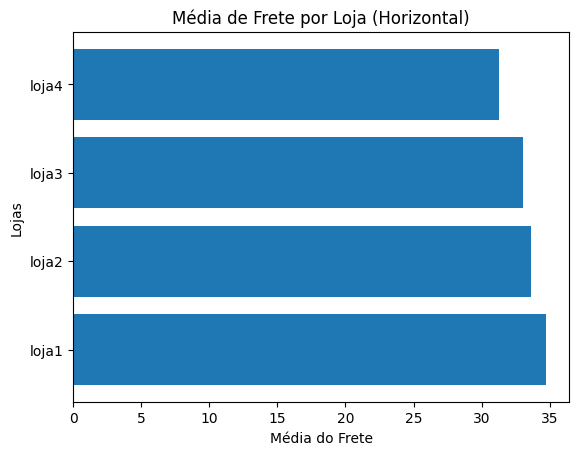

In [38]:
plt.barh(lojas, valor_medio_frete)
plt.title('M√©dia de Frete por Loja (Horizontal)')
plt.xlabel('M√©dia do Frete')
plt.ylabel('Lojas')
plt.show()

# Relt√≥rio Final


# üìä Relat√≥rio Comparativo de Performance das Lojas

## üìù Introdu√ß√£o

O presente relat√≥rio tem como objetivo realizar uma an√°lise comparativa entre quatro lojas, com base em indicadores-chave de desempenho: **faturamento, avalia√ß√£o m√©dia dos clientes, valor m√©dio do frete**, e **perfil dos produtos mais e menos vendidos**. A partir dessa an√°lise, buscamos determinar qual loja se apresenta como a **melhor candidata para venda**, considerando seu desempenho atual e seu potencial estrat√©gico, al√©m de identificar qual loja tem o desempenho mais fraco.

---

## üìà An√°lise dos Indicadores

### 1. **Faturamento Total**

| Loja   | Faturamento (R$)     |
|--------|----------------------|
| **Loja 1** | **1.534.509,12** ‚úÖ |
| Loja 2 | 1.488.459,06         |
| Loja 3 | 1.464.025,03         |
| **Loja 4** | **1.384.497,58** ‚ùå |

> A Loja 1 lidera com folga em faturamento, demonstrando maior capacidade de gera√ß√£o de receita. A Loja 4 √© a que menos fatura.

---

### 2. **M√©dia das Avalia√ß√µes dos Clientes**

| Loja   | Avalia√ß√£o M√©dia (‚≠ê)  |
|--------|----------------------|
| **Loja 3** | **4.05** ‚úÖ         |
| Loja 2 | 4.04                |
| Loja 4 | 4.00                |
| **Loja 1** | **3.98** ‚ùå         |

> A Loja 3 tem a melhor avalia√ß√£o m√©dia dos clientes, o que sugere uma boa experi√™ncia de compra. A Loja 1 tem a menor m√©dia, embora ainda pr√≥xima das demais.

---

### 3. **Valor M√©dio do Frete**

| Loja   | Frete M√©dio (R$)     |
|--------|----------------------|
| **Loja 4** | **31,28** ‚úÖ         |
| Loja 3 | 33,07                |
| Loja 2 | 33,62                |
| **Loja 1** | **34,69** ‚ùå         |

> A Loja 4 possui o frete mais acess√≠vel, enquanto a Loja 1 apresenta o maior custo de entrega ‚Äî um ponto de aten√ß√£o, embora compensado pelo seu faturamento elevado.

---

### 4. **An√°lise dos Produtos em Destaque**

| Loja   | Mais Vendido       | Menos Vendido        |
|--------|---------------------|----------------------|
| Loja 1 | Micro-ondas         | Celular ABXY         |
| Loja 2 | Livro t√©cnico       | Jogo de tabuleiro    |
| Loja 3 | Kit de banquetas    | Blocos de montar     |
| Loja 4 | Cama box            | Guitarra             |

> A Loja 1 destaca-se com produtos de ticket m√©dio relevante como micro-ondas e m√≥veis. A Loja 4 teve como produto menos vendido uma guitarra ‚Äî um item de valor alto e nichado, que pode estar desalinhado com o perfil de consumo.

---

## ‚úÖ Conclus√£o e Recomenda√ß√£o Estrat√©gica

### üü¢ Melhor Loja para Venda: **Loja 1**

A **Loja 1** se posiciona como a melhor candidata √† venda por apresentar um conjunto s√≥lido de atributos comerciais:

1. **Desempenho Financeiro Superior**  
   Lideran√ßa em faturamento (R$ 1.534.509,12), evidenciando forte presen√ßa de mercado e capacidade de convers√£o em vendas.

2. **Mix de Produtos com Alta Demanda**  
   Forte atua√ß√£o em categorias de alto giro como m√≥veis, eletr√¥nicos e brinquedos, o que garante resili√™ncia e diversifica√ß√£o nas vendas.

3. **Alto Potencial de Valoriza√ß√£o**  
   Apesar de ter a m√©dia de avalia√ß√£o mais baixa (3.98) e frete mais caro, esses s√£o pontos facilmente ajust√°veis, especialmente se a loja for integrada a uma opera√ß√£o com log√≠stica mais eficiente e estrat√©gias de melhoria no atendimento ao cliente.

**Conclus√£o:**  
Com uma base financeira robusta e estrutura de vendas bem estabelecida, a Loja 1 √© a **mais atrativa para venda**. Pequenos ajustes podem elevar ainda mais sua lucratividade e atratividade para investidores.

---

### üî¥ Loja com Pior Desempenho: **Loja 4**

A **Loja 4** apresenta os sinais mais fracos entre as quatro analisadas:

- Menor faturamento absoluto.
- Apesar do menor frete, isso n√£o se converteu em vantagem competitiva.
- Avalia√ß√£o mediana e aus√™ncia de lideran√ßa em qualquer crit√©rio estrat√©gico.
- Ind√≠cios de sortimento desalinhado (produto menos vendido: guitarra).

**Conclus√£o:**  
A Loja 4 demonstra **baixo desempenho financeiro** e **fraca tra√ß√£o de mercado**, sendo a **menos indicada para venda imediata** e, caso permane√ßa em opera√ß√£o, requer uma revis√£o estrat√©gica mais profunda.
